# **K-means & Hierarchical Clustering**
This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the data dictionary for credit card dataset :

**CUST_ID:** Identification of credit cardholder (Categorical)

**BALANCE:** Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated))

**PURCHASES:** Amount of purchases made from the account

**ONEOFF_PURCHASES:** Maximum purchase amount done in once

**INSTALLMENTS_PURCHASES:** Amount of purchase done in installments

**CASH_ADVANCE:** Cash in advance given by the user

**PURCHASES_FREQUENCY:** How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY:** How frequently purchases are happening at once (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY:** How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY:** How frequently the cash in advance is being paid

**CASHADVANCETRX:** Number of transactions made with "Cash in Advance" PURCHASES_TRX: Number of purchase transactions made

**CREDIT_LIMIT:** Limit of credit card for user

**PAYMENTS:** Amount of payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

1. Load your dataset.

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters.

4. Plot the dendrogram. Use K-means clustering.

5. Try different K values and select the best one.

6. Plot the clusters.

7. Compare the two results.

Bonus: Search for another validation metric

# **Pre-step**: Imports

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **I - Data Exploration**

In [ ]:
data = pd.read_csv("/content/CC GENERAL (1).csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
data.isna().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [ ]:
data["CUST_ID"].duplicated().sum()

0

In [ ]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
(data["MINIMUM_PAYMENTS"].isna().sum()/data.shape[0])*100

3.4972067039106145

We see that 3% of the minimum payments column are NaN values, so we can just ampute them with the mean value.

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

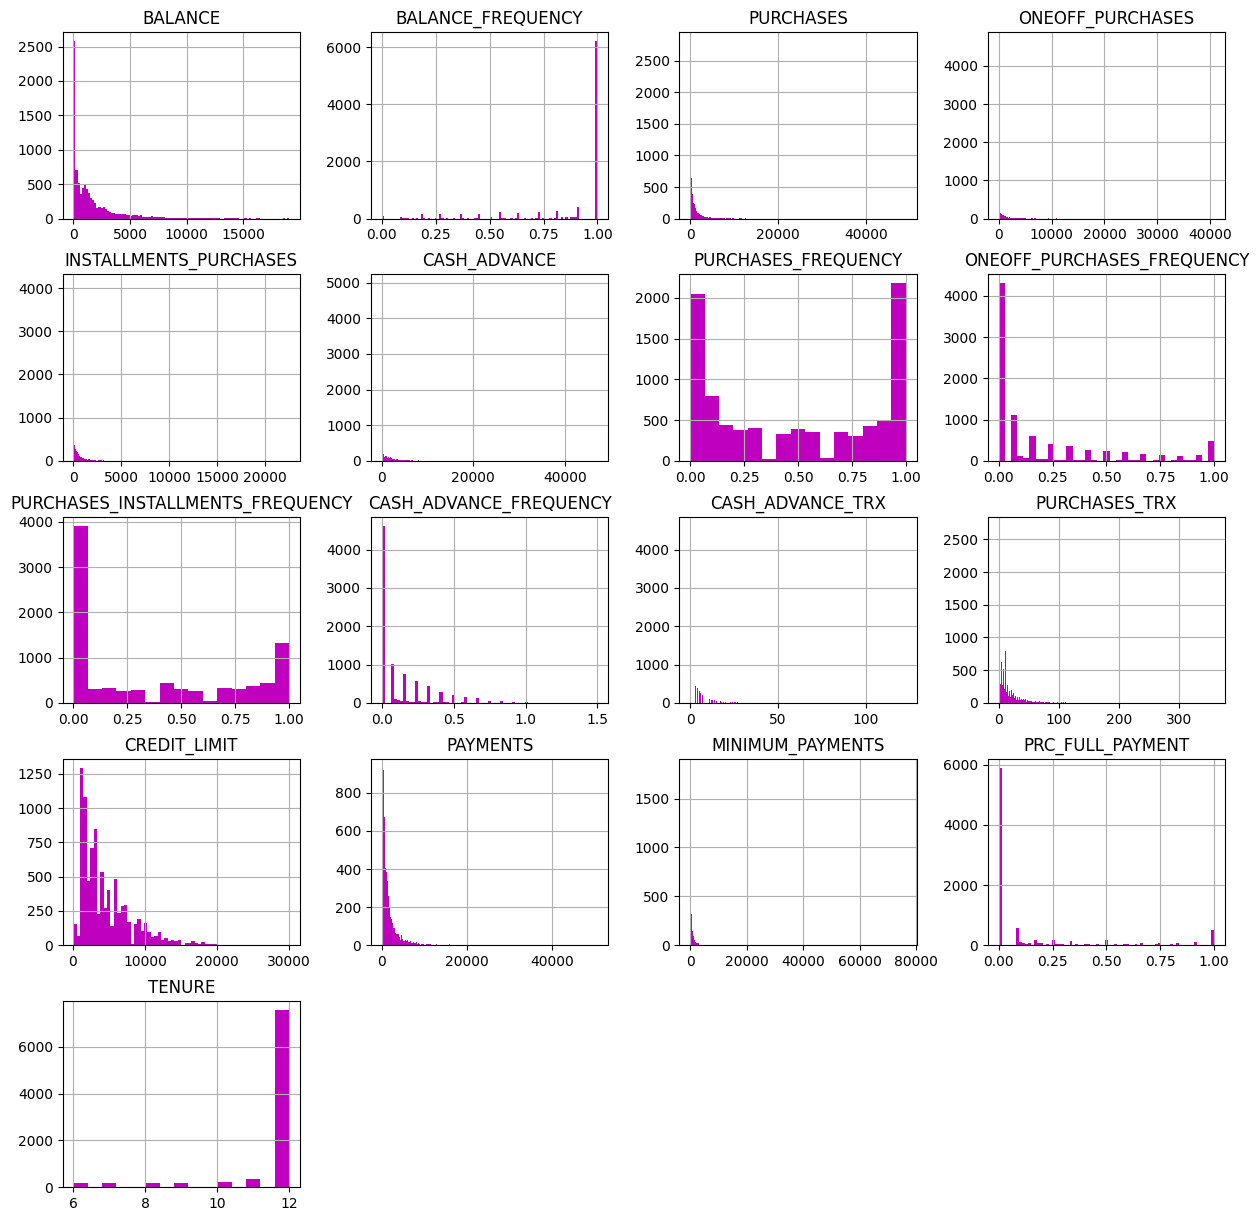

In [ ]:
data.hist(bins='auto', figsize=(15,15), color="m")

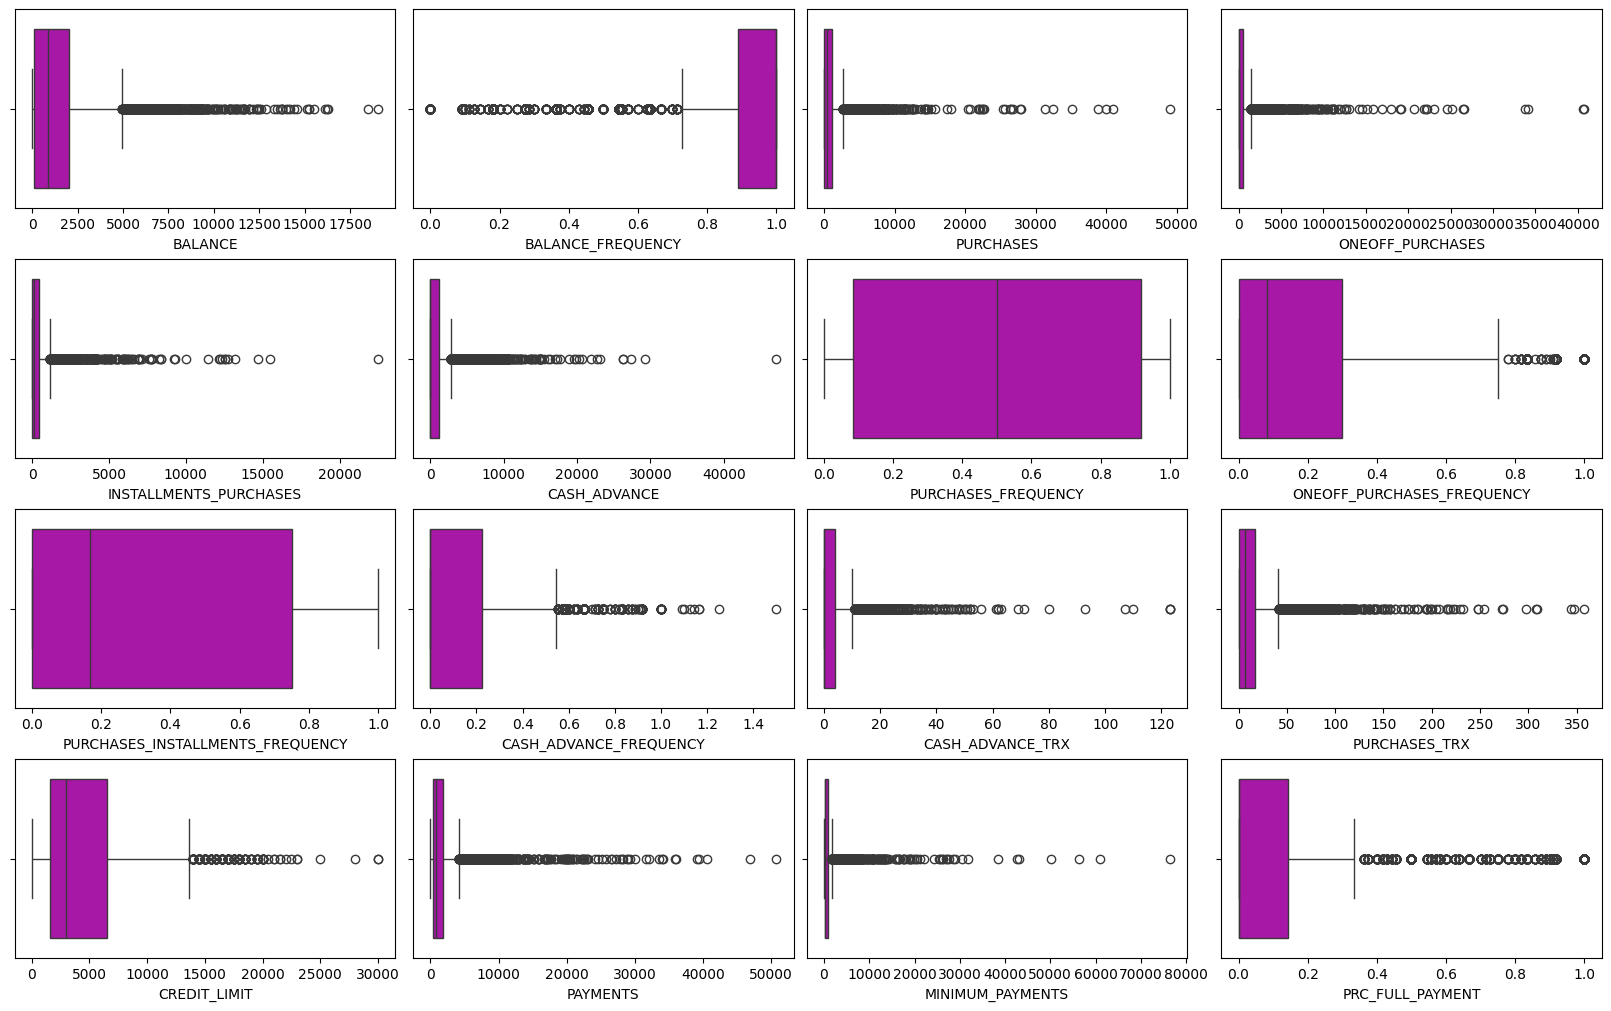

In [ ]:
fig = plt.figure(figsize=(16,10), constrained_layout=True)
j = 1
features = data.select_dtypes(exclude='object').columns.to_list()
features.remove('TENURE')
for feature in features:
    ax = plt.subplot(4, 4, j)
    ax = sns.boxplot(data=data, x=feature, color="m")
    j = j+1

Let's checkout how the features correlate to each other:

<ipython-input-11-6b149de39f3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(data.corr().round(decimals=3), annot=True)


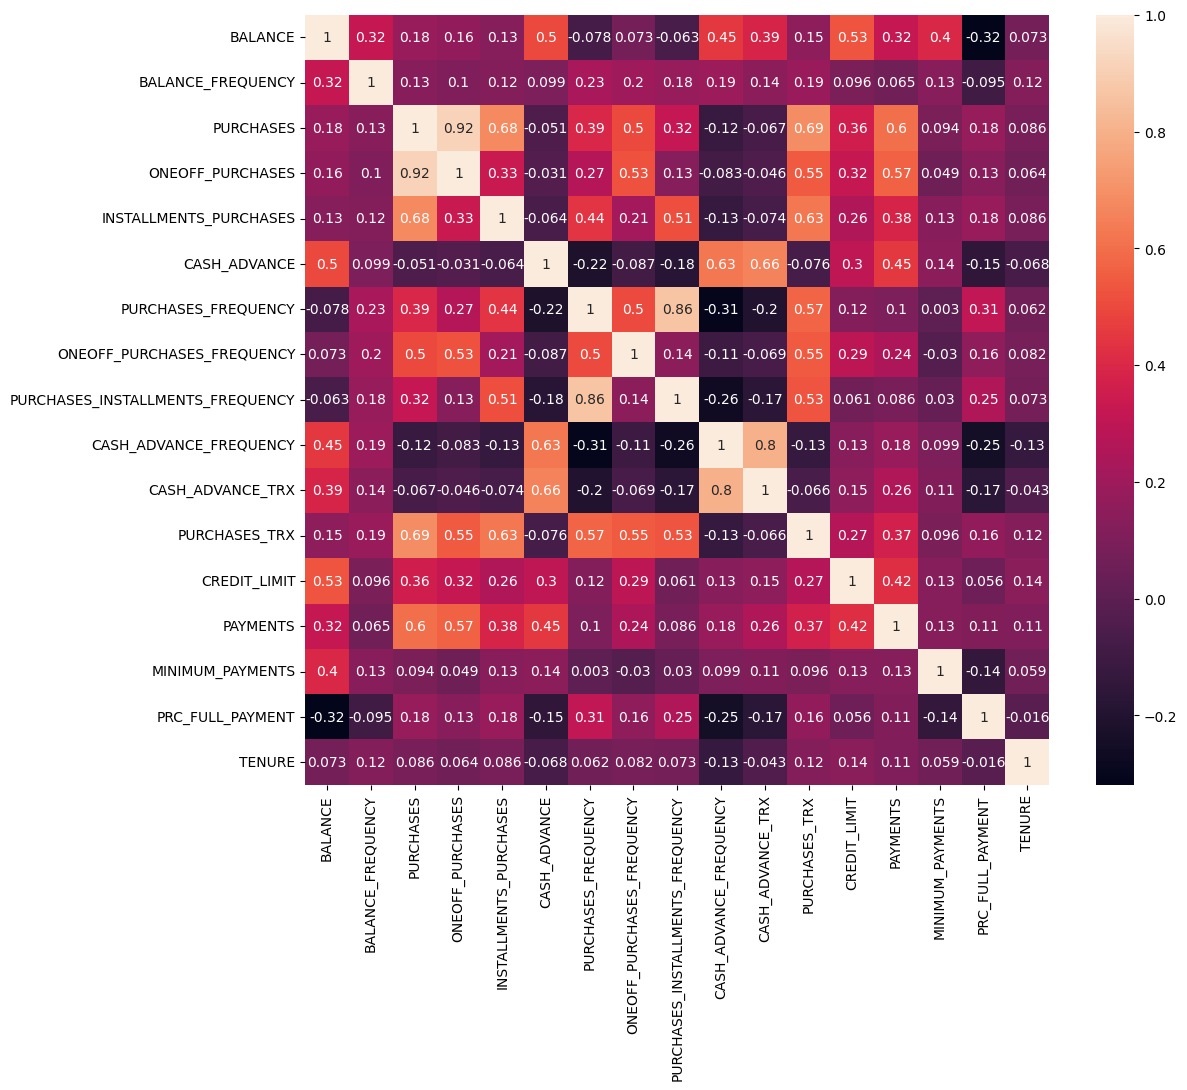

In [ ]:
s , ax = plt.subplots( figsize =( 12 , 10 ) )
s = sns.heatmap(data.corr().round(decimals=3), annot=True)

# **II - Pre-processing**

First of all, let's get rid of the customer id column since it isn't relevant here.

In [ ]:
data.drop(columns='CUST_ID', inplace=True)

Let's then ampute the missing values in the credit limit and minimum payments columns

In [ ]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace=True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [ ]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# **III - Clustering**: with and without dimentionality reduction (PCA)

For the clutering we will take two approaches and see which one is better, performance wise and even visually:

**A first method** would be to simply use hierarchical and k-means clustering on all our data with all the features and choose two features to visualize the clusters at the end.

**A second method** would be to use PCA:

PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving most of its variance. In clustering, PCA can help improve clustering performance by reducing the dimensionality of the data, making clusters more distinct and computationally efficient.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

**Method 1**: Hierarchichal clustering and K-means on our data without PCA

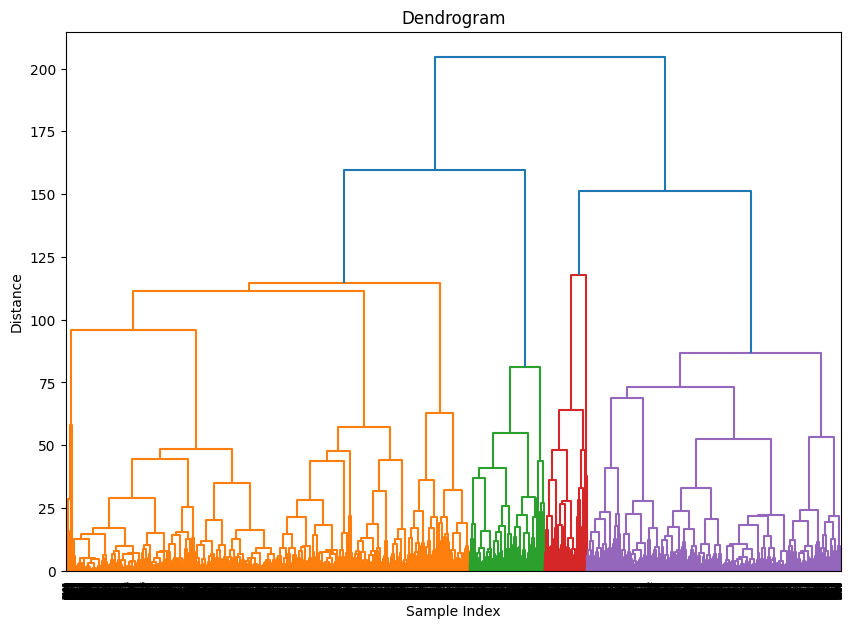

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
# Using dendrogram to find the optimal number of clusters
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
labels = hierarchy.fcluster(linked,150, criterion='distance')
pd.Series(labels).value_counts()

4    4668
1    2931
3     864
2     487
dtype: int64

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

to visualize i choose two columns that correlate well enough.

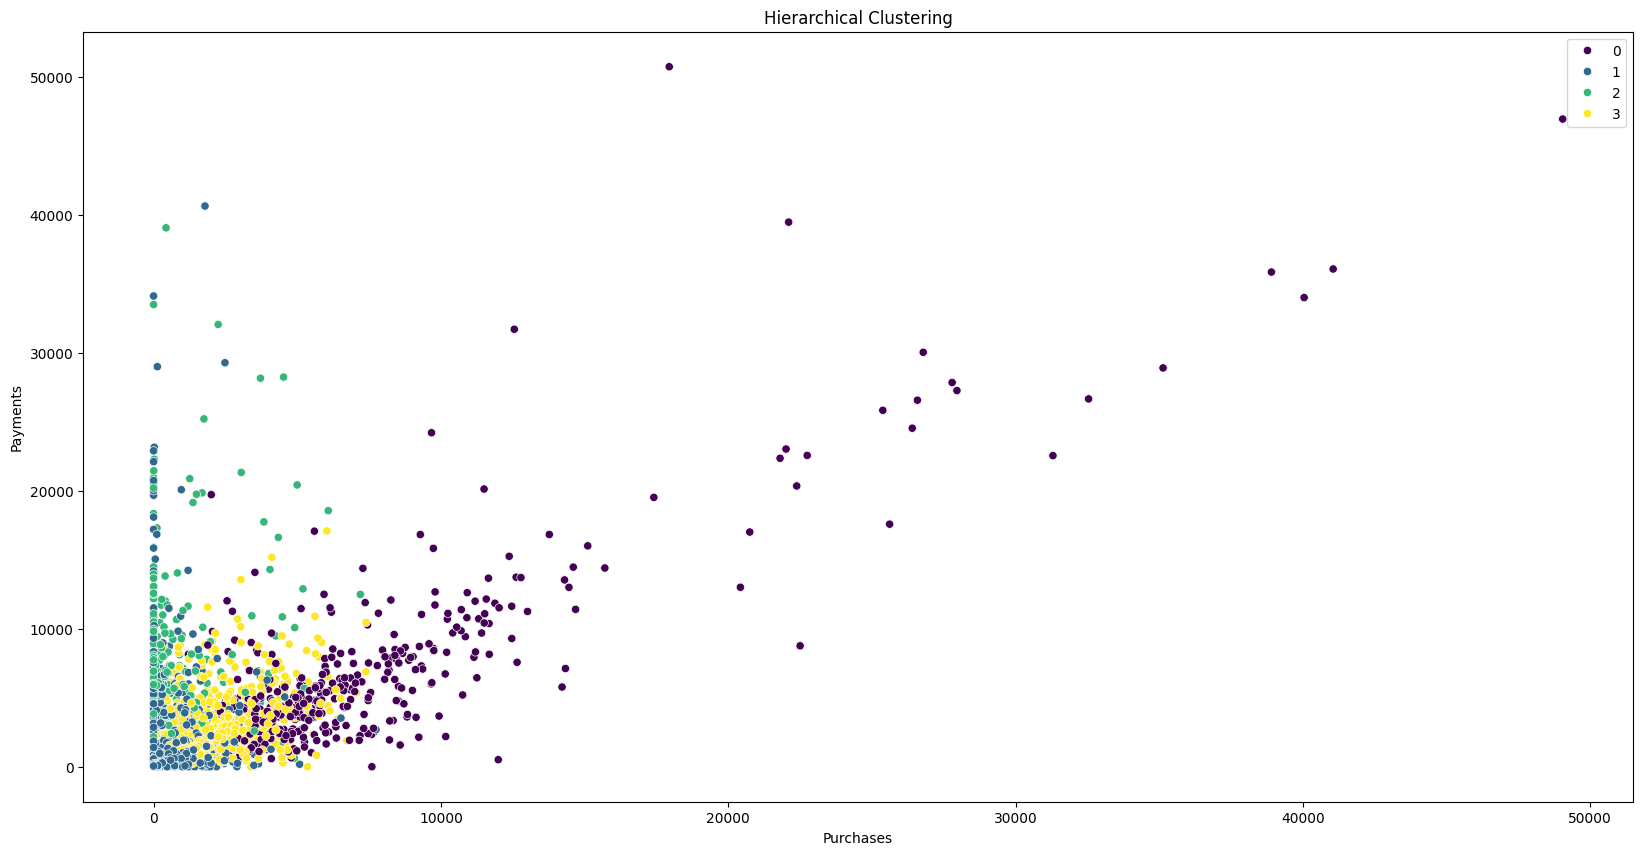

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['PURCHASES'], y=data['PAYMENTS'], hue=hierarchical_cluster.labels_, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.show()

We clearly can't distinguish the clusters with precision since we just choose two variables to display the clusters on.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

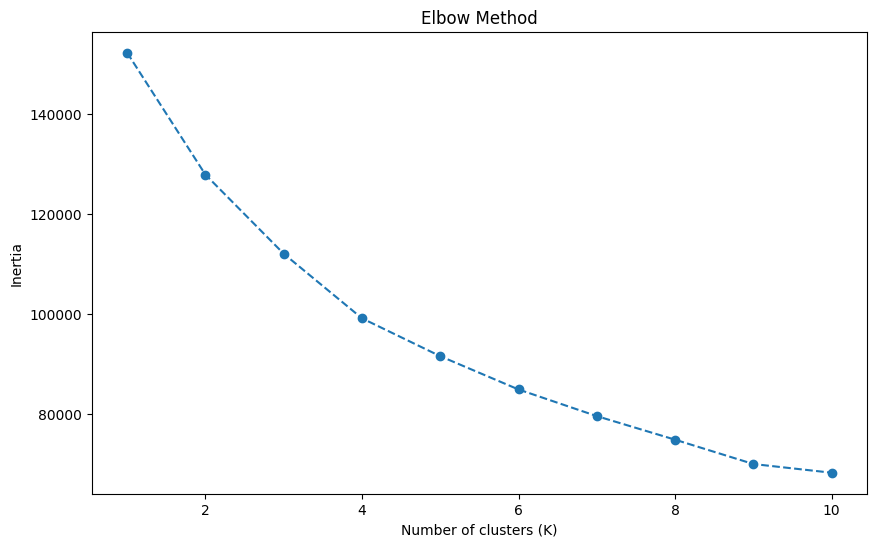

In [ ]:
# K-means clustering
# Try different K values and select the best one
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


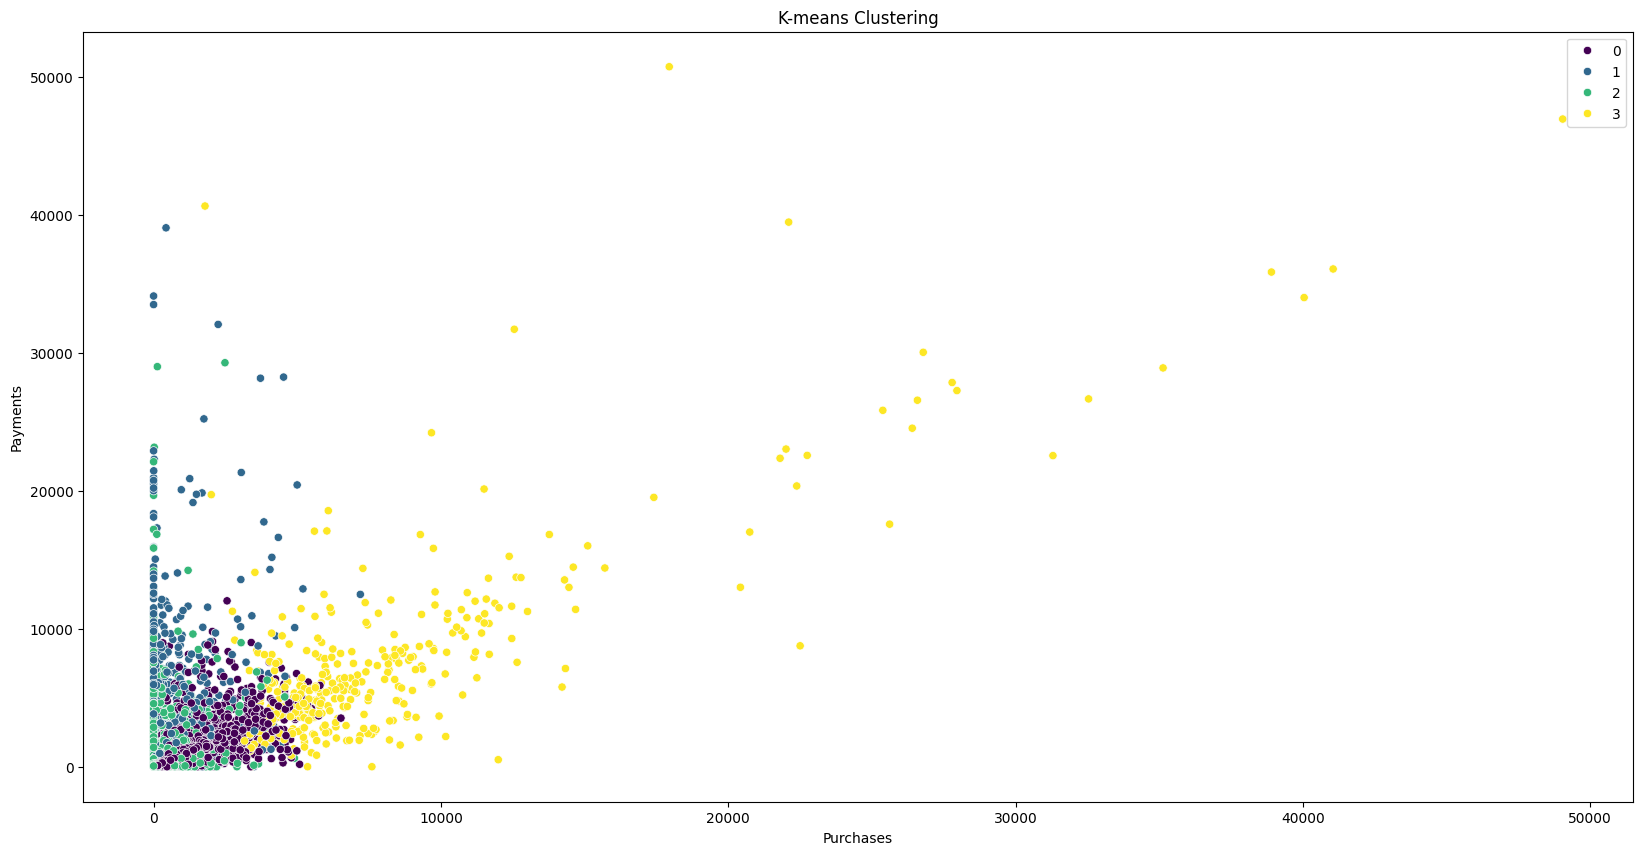

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Plot the clusters
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['PURCHASES'], y=data['PAYMENTS'], hue=kmeans.labels_, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

hierarchical_silhouette_score = silhouette_score(scaled_data, hierarchical_cluster.labels_)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette_score)

kmeans_silhouette_score = silhouette_score(scaled_data, kmeans.labels_)
print("K-means Clustering Silhouette Score:", kmeans_silhouette_score)

Hierarchical Clustering Silhouette Score: 0.1547093352037027
K-means Clustering Silhouette Score: 0.1976074492720698


**Method 2**: Hierarchical clustering and K-means using PCA

Let's apply PCA and fix the number of reduced features to two:

In [ ]:
pca = PCA(n_components=2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(8950, 2)

In [ ]:
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-1.682220,-1.076451
1,-1.138296,2.506476
2,0.969685,-0.383521
3,-0.873628,0.043166
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016145
8946,-0.564369,-1.639123
8947,-0.926204,-1.810785
8948,-2.336552,-0.657966


This scatter plot represents our data integrally this time.

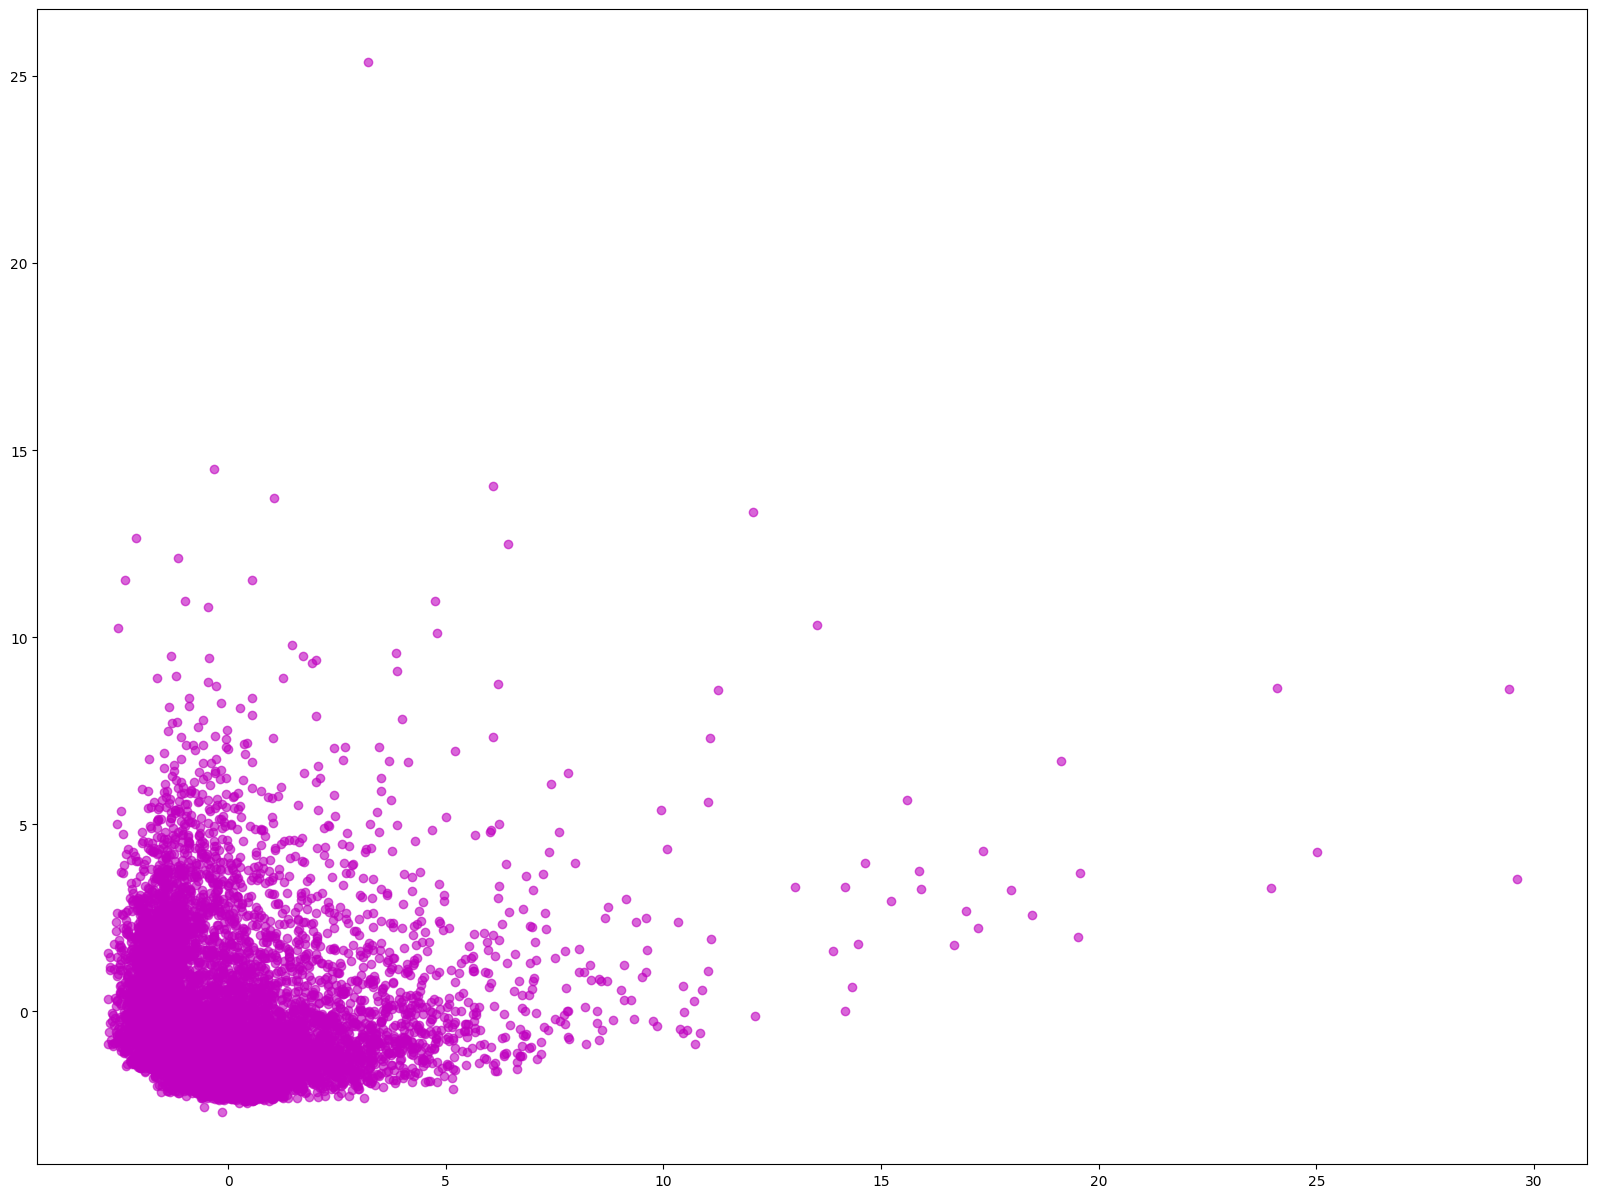

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(x_pca[:,0], x_pca[:,1], alpha=0.6, color="m")

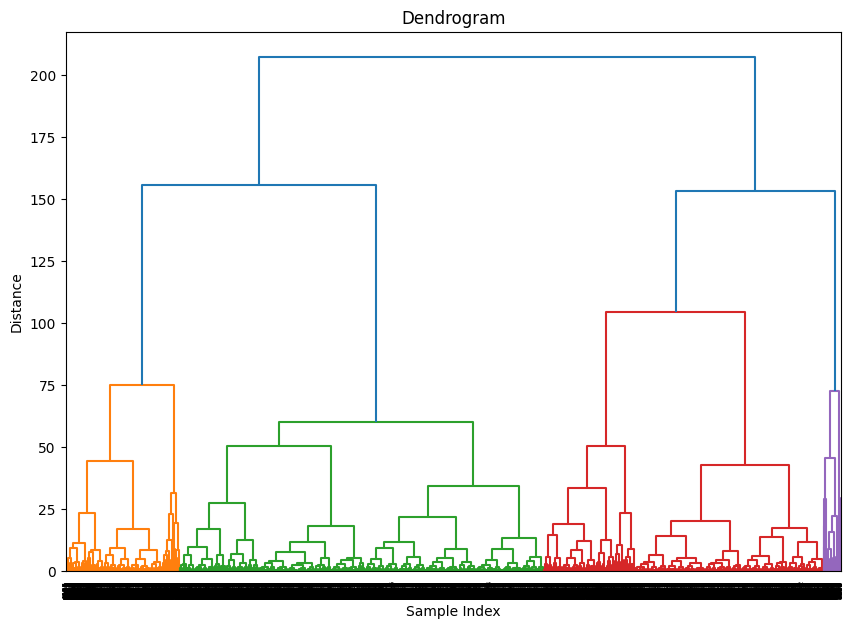

In [ ]:
# Hierarchical clustering
linked = linkage(pca_df, method='ward')
plt.figure(figsize=(10, 7))
# Using dendrogram to find the optimal number of clusters
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
labels = hierarchy.fcluster(linked,150, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

3    4209
2    3232
4    1317
1     192
dtype: int64

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

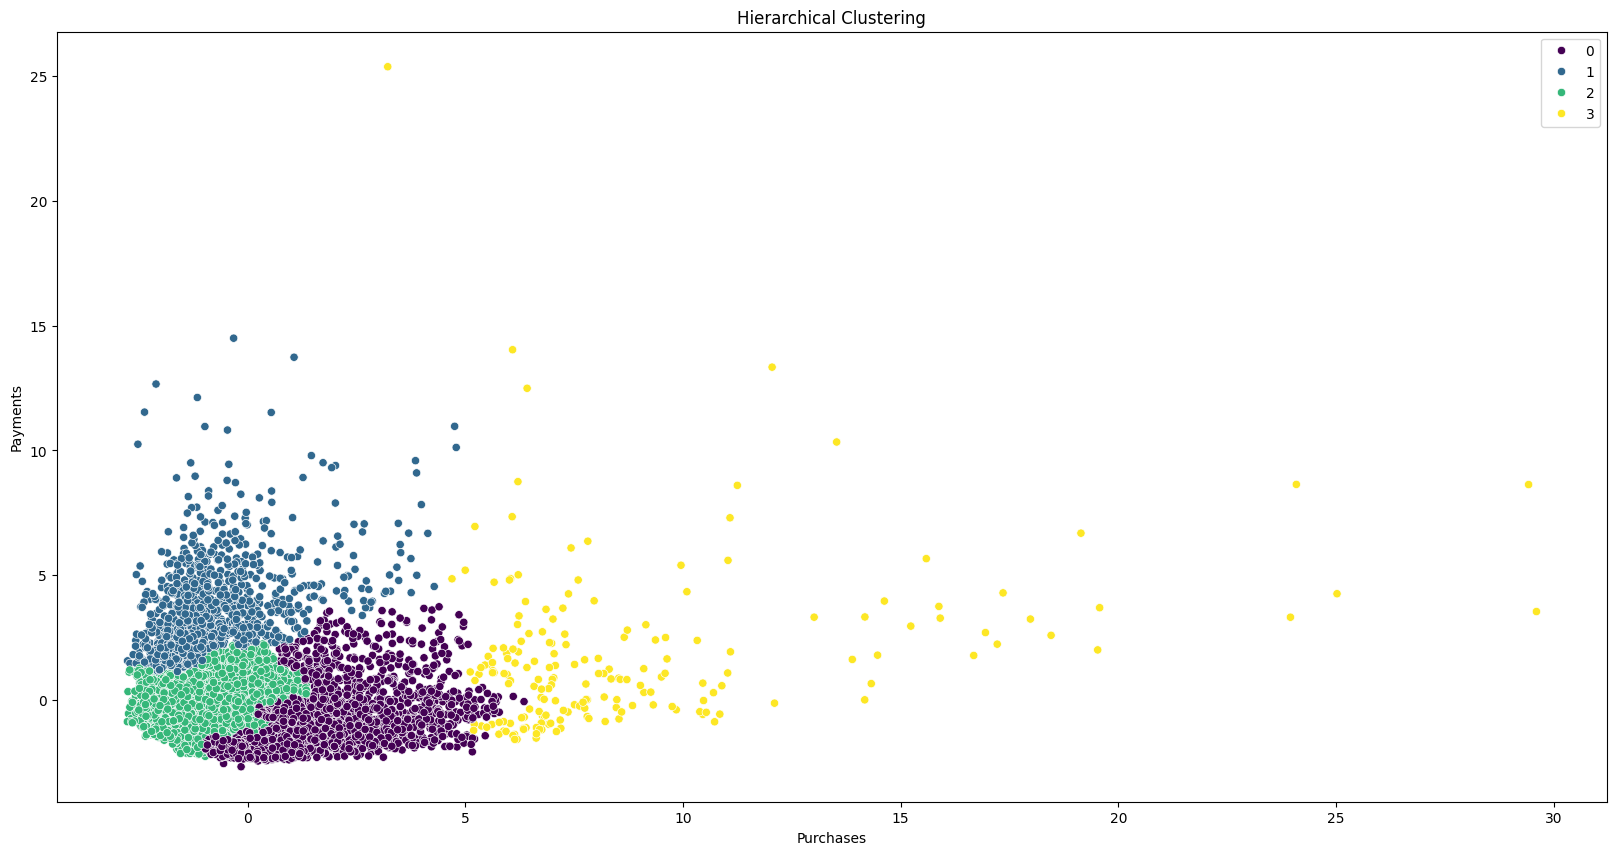

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=hierarchical_cluster.labels_, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.show()

Here we can see that this time the cluster borders are more defined and clear compared to when we didn't use PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

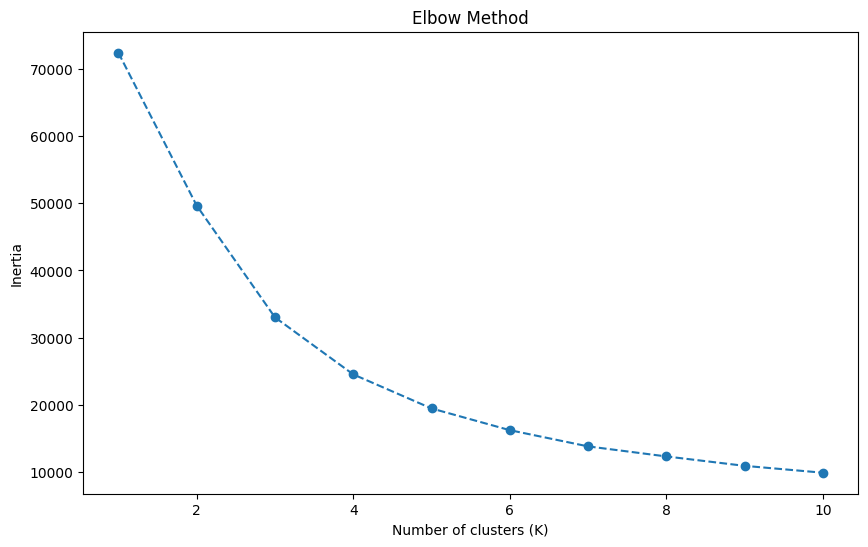

In [ ]:
# K-means clustering
# Try different K values and select the best one
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


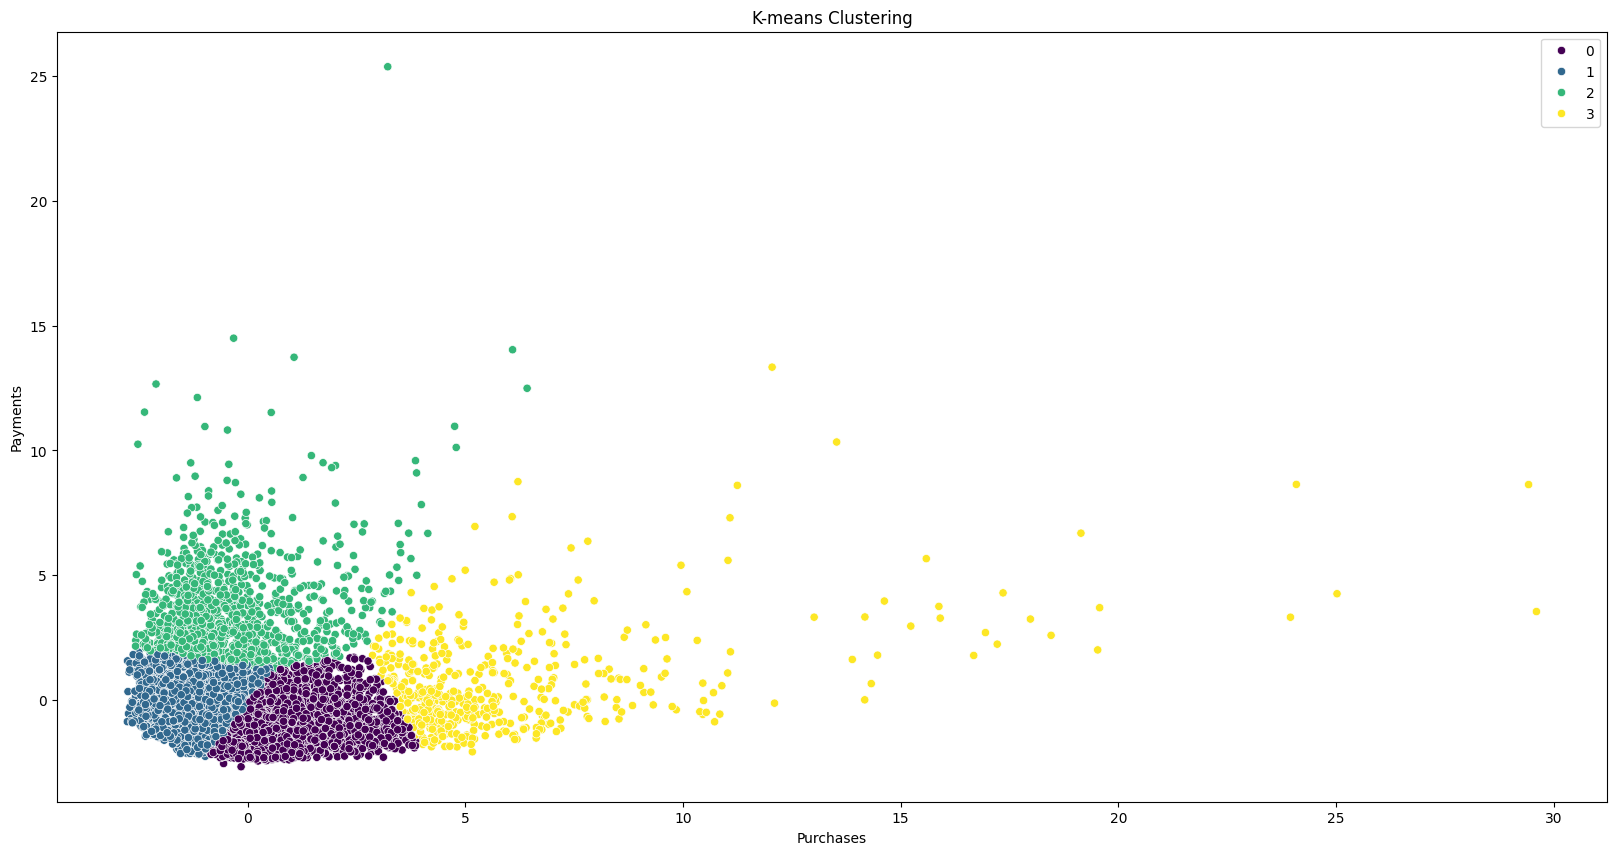

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)

# Plot the clusters
plt.figure(figsize=(20, 10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=kmeans.labels_, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.show()

**Comparison between with or without PCA**: it is clear that using PCA is a much better approach wether it is performance wise or just visually.

**Comparison between hierarchical and k-means clustering**
In terms of method variation, the plots exhibited distinct cluster formations and boundaries when using PCA.

Notably, K-means showed clear boundary lines, while agglomerative clustering displayed rougher edges. Runtime varied significantly, with hierarchical clustering being notably time-consuming due to dendrogram computation, and K-means outperformed, requiring less than a second for computation.


**New performance metric**:

The Silhouette Score is a commonly used metric in supervised learning models for assessing performance. It computes the mean distances between samples within the same cluster and to points in the nearest neighboring cluster, yielding a coefficient bounded between -1 and 1. A score closer to 1 indicates better clustering with dense and well-separated clusters, while -1 signifies incorrect clustering.

In [ ]:
hierarchical_silhouette_score = silhouette_score(pca_df, hierarchical_cluster.labels_)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette_score)

kmeans_silhouette_score = silhouette_score(pca_df, kmeans.labels_)
print("K-means Clustering Silhouette Score:", kmeans_silhouette_score)

Hierarchical Clustering Silhouette Score: 0.36073294120169114
K-means Clustering Silhouette Score: 0.4076682353866495
